In [166]:
import pandas as pd
import numpy as np
df = pd.read_sas(r'\\10.186.237.122\grcm\GCRM-GEN\GCCRM\Group Corporate Credit Risk\Pet Project\Financial Ratio(CREST)\2305\extraction_py1.sas7bdat', encoding='iso-8859-1')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [167]:
df.head()

,NAME,ID_NUMBER,Receivable_cycle,RCF_to_TotLiab,EBITDA_to_STD_IntExp,Return_on_Equity,Quick_Ratio
0,3G AUTO SPARES SDN. BHD.,984820H,83.24,-0.08,0.39,0.19,0.62
1,99 SPEED MART SDN. BHD.,519537X,1.81,0.41,92.62,0.63,0.11
2,A TECH PROPERTIES SDN BHD,1296829X,80.72,0.20,10.30,1.40,0.70
3,A-LOOK EYEWEAR SDN. BHD.,591659X,6.32,-0.10,1.61,-0.11,0.17
4,A. K. KOH ENTERPRISE SDN. BHD.,204515K,95.94,-0.50,3.59,0.38,2.81


In [168]:
df.describe()

,Receivable_cycle,RCF_to_TotLiab,EBITDA_to_STD_IntExp,Return_on_Equity,Quick_Ratio
count,2188.00,2188.00,2188.00,2188.00,2188.00
mean,485.43,0.07,430.93,0.05,1.13
std,14475.52,1.96,15291.08,3.26,3.46
min,-26578.23,-12.99,-1435.00,-142.40,-93.75
25%,27.45,-0.10,0.20,0.03,0.40
50%,64.46,0.02,0.63,0.10,0.74
75%,122.80,0.16,2.42,0.22,1.22
max,672188.06,77.30,711076.00,20.10,72.62


In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

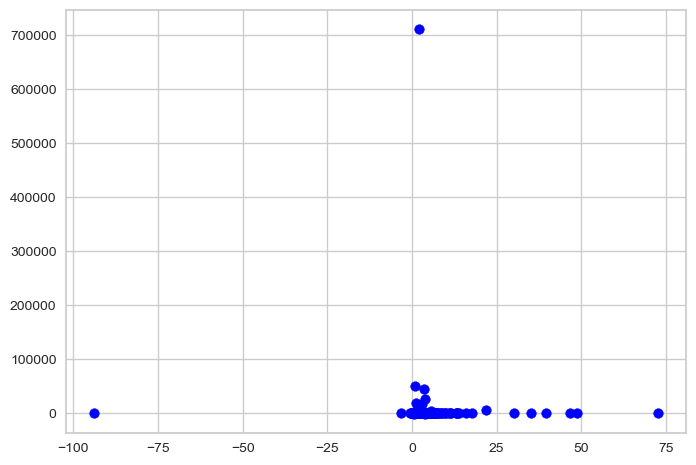

In [170]:
plt.scatter(df['Quick_Ratio'],df['EBITDA_to_STD_IntExp'],c='blue',cmap='rainbow')

In [171]:
from pandasql import sqldf


In [172]:
# Removing (statistical) outliers 
import numpy as np
q1_Receivable = np.percentile(df['Receivable_cycle'], 25)
q3_Receivable = np.percentile(df['Receivable_cycle'], 75)
IQR_Receivable = q3_Receivable - q1_Receivable

q1_RCF = np.percentile(df['RCF_to_TotLiab'], 25)
q3_RCF = np.percentile(df['RCF_to_TotLiab'], 75)
IQR_RCF = q3_RCF - q1_RCF

q1_EBITDA = np.percentile(df['EBITDA_to_STD_IntExp'], 25)
q3_EBITDA = np.percentile(df['EBITDA_to_STD_IntExp'], 75)
IQR_EBITDA = q3_EBITDA - q1_EBITDA

q1_ROE = np.percentile(df['Return_on_Equity'], 25)
q3_ROE = np.percentile(df['Return_on_Equity'], 75)
IQR_ROE = q3_ROE - q1_ROE

q1_Quick = np.percentile(df['Quick_Ratio'], 25)
q3_Quick = np.percentile(df['Quick_Ratio'], 75)
IQR_Quick = q3_Quick - q1_Quick

df_x_outlier= df[((df['Receivable_cycle'] >=  q1_Receivable - 1.5*IQR_Receivable)& (df['Receivable_cycle'] <= q3_Receivable + 1.5*IQR_Receivable)&(df['RCF_to_TotLiab'] >=  q1_RCF - 1.5*IQR_RCF)& (df['RCF_to_TotLiab'] <= q3_RCF + 1.5*IQR_RCF)&(df['EBITDA_to_STD_IntExp'] >=  q1_EBITDA - 1.5*IQR_EBITDA)& (df['EBITDA_to_STD_IntExp'] <= q3_EBITDA + 1.5*IQR_EBITDA)&(df['Return_on_Equity'] >=  q1_ROE - 1.5*IQR_ROE)& (df['Return_on_Equity'] <= q3_ROE + 1.5*IQR_ROE)&(df['Quick_Ratio'] >=  q1_Quick - 1.5*IQR_Quick)& (df['Quick_Ratio'] <= q3_Quick + 1.5*IQR_Quick))]


df_x_outlier.describe()

## ELBOW

## ELBOW METHOD
### Distortion Score : mean of the squared distances from the cluster centers of the respective clusters

### ELBOW

## Removing Outlier

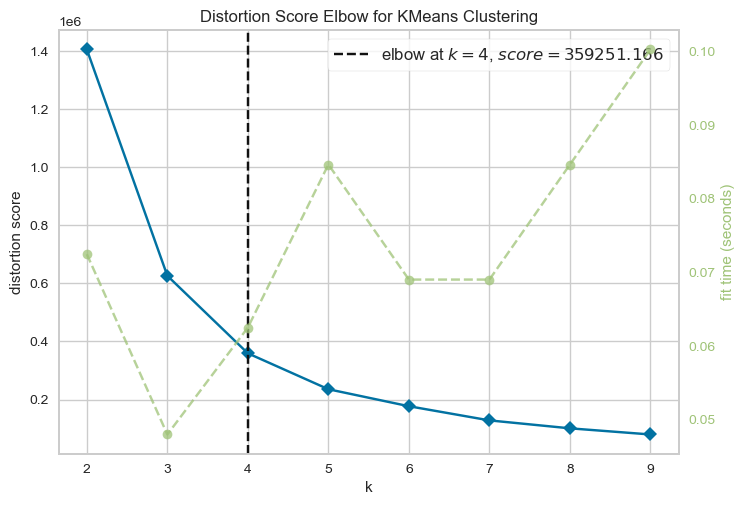

In [174]:
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer

X_data_outlier = df_x_outlier[['Receivable_cycle', 'RCF_to_TotLiab', 'EBITDA_to_STD_IntExp','Return_on_Equity','Quick_Ratio']] 
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_data_outlier)
visualizer.show()
plt.show()

## Scaled

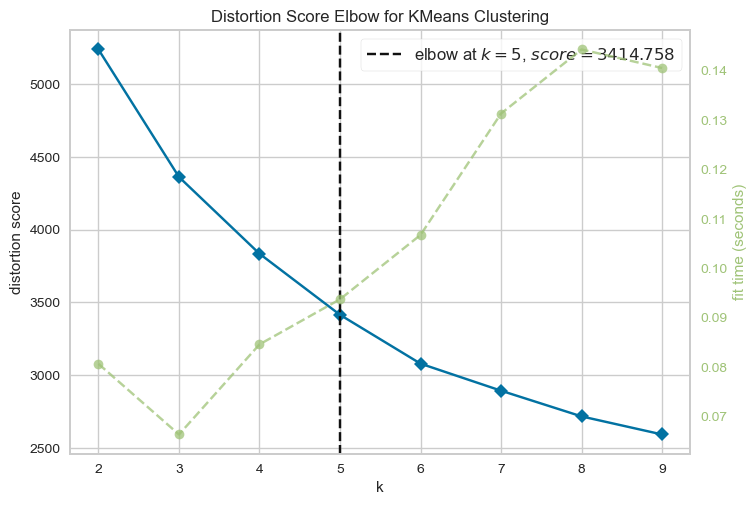

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [175]:
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 



X_data_outlier = df_x_outlier[['Receivable_cycle', 'RCF_to_TotLiab', 'EBITDA_to_STD_IntExp','Return_on_Equity','Quick_Ratio']] 

scaler = StandardScaler()

# fit_transform
X_data_outlier_scaled = scaler.fit_transform(X_data_outlier)


model = KMeans(random_state=1)
elb_visualizer = KElbowVisualizer(model, k=(2,10))

elb_visualizer.fit(X_data_outlier_scaled)
elb_visualizer.show()

## Silhouette Analysis
### Score closer to 1 indicates data point similiar to other data points in the cluster

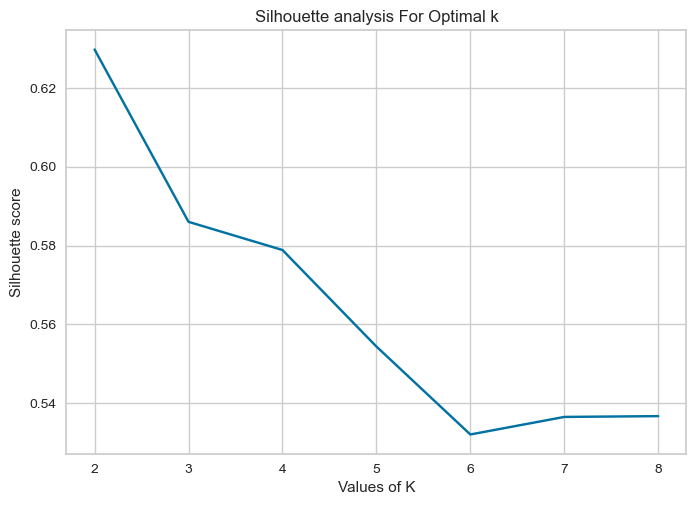

In [176]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_data_outlier)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(X_data_outlier, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

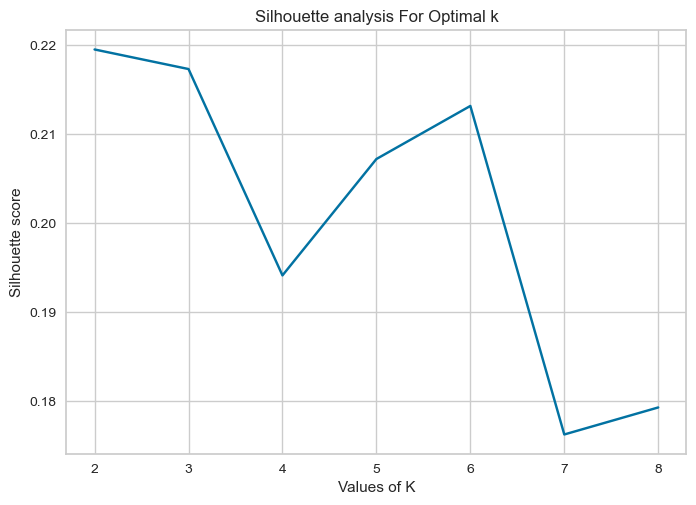

In [177]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_data_outlier_scaled)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(X_data_outlier_scaled, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [178]:
km_scaled = KMeans(n_clusters=3, random_state=42)
km_scaled.fit(X_data_outlier_scaled)
print(km_scaled.cluster_centers_)
print(km_scaled.labels_)

[[ 1.2993541  -0.36499147 -0.34952023 -0.38050251  0.45423748]
 [-0.32901693  0.73235158  1.33577524  0.61451075  0.84140686]
 [-0.48107646 -0.10687773 -0.34229438 -0.05508363 -0.52988635]]
[2 2 0 ... 0 1 2]


In [179]:
for center in km_scaled.cluster_centers_:
    center_as_float = [float(x) for x in center]
    print(center_as_float)

[1.2993541039617806, -0.3649914668201796, -0.3495202268201148, -0.38050251050459627, 0.4542374842182313]
[-0.3290169311790524, 0.7323515792167925, 1.3357752412567088, 0.6145107521048437, 0.8414068599319057]
[-0.48107645832665574, -0.10687773238958141, -0.3422943835576822, -0.05508363294048308, -0.5298863511467663]


In [180]:
df_x_outlier['Cluster_scaled'] = km_scaled.labels_
df_x_outlier

C:\Users\459354\AppData\Local\Temp\ipykernel_17080\2553972269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_outlier['Cluster_scaled'] = km_scaled.labels_


,NAME,ID_NUMBER,Receivable_cycle,RCF_to_TotLiab,EBITDA_to_STD_IntExp,Return_on_Equity,Quick_Ratio,Cluster_scaled
0,3G AUTO SPARES SDN. BHD.,984820H,83.24,-0.08,0.39,0.19,0.62,2
3,A-LOOK EYEWEAR SDN. BHD.,591659X,6.32,-0.10,1.61,-0.11,0.17,2
5,AAY CONSTRUCTION SDN. BHD.,84131T,139.62,0.16,1.10,0.11,0.62,0
6,AB TECHNOLOGY (M) SDN. BHD.,411227K,82.25,0.33,2.22,0.03,1.41,1
7,ABEX MEDICAL SYSTEM SDN BHD,074062D,128.18,-0.08,1.54,0.14,1.92,0
...,...,...,...,...,...,...,...,...
2179,ZETRO SERVICES SDN. BHD.,236761P,118.05,0.02,0.15,0.04,0.32,2
2180,ZETWIND ENTERPRISE SDN. BHD.,713419X,80.96,0.25,3.31,0.21,0.93,1
2181,ZHONG YING CONSTRUCTION SDN. BHD.,274036A,103.26,0.15,0.24,-0.09,0.72,0
2185,ZUE BAO JEWELLERY SDN. BHD.,615964U,0.27,0.55,0.27,0.05,1.38,1


In [181]:
km_x_scaled = KMeans(n_clusters=3, random_state=42)
km_x_scaled.fit(X_data_outlier)
print(km_x_scaled.cluster_centers_)
print(km_x_scaled.labels_)

[[ 8.58520697e+01  1.61065574e-02  7.37274590e-01  1.02816393e-01
   8.06454918e-01]
 [ 1.80533788e+02 -1.40534900e-02  7.12636816e-01  7.49154229e-02
   8.91542289e-01]
 [ 2.52693146e+01  4.63558297e-02  9.74061990e-01  1.40637520e-01
   5.91076672e-01]]
[0 2 1 ... 0 2 2]


In [182]:

for center in km_x_scaled.cluster_centers_:
    center_as_float = [float(x) for x in center]
    print(center_as_float)

[85.85206967213115, 0.016106557377049184, 0.7372745901639344, 0.10281639344262294, 0.8064549180327869]
[180.53378759651744, -0.014053490049751247, 0.7126368159203981, 0.07491542288557215, 0.891542288557214]
[25.269314640831972, 0.04635582965742251, 0.9740619902120717, 0.1406375203915171, 0.5910766721044046]


In [183]:
df_x_outlier['Cluster_x_scaled'] = km_x_scaled.labels_
df_x_outlier

C:\Users\459354\AppData\Local\Temp\ipykernel_17080\582637765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_outlier['Cluster_x_scaled'] = km_x_scaled.labels_


,NAME,ID_NUMBER,Receivable_cycle,RCF_to_TotLiab,EBITDA_to_STD_IntExp,Return_on_Equity,Quick_Ratio,Cluster_scaled,Cluster_x_scaled
0,3G AUTO SPARES SDN. BHD.,984820H,83.24,-0.08,0.39,0.19,0.62,2,0
3,A-LOOK EYEWEAR SDN. BHD.,591659X,6.32,-0.10,1.61,-0.11,0.17,2,2
5,AAY CONSTRUCTION SDN. BHD.,84131T,139.62,0.16,1.10,0.11,0.62,0,1
6,AB TECHNOLOGY (M) SDN. BHD.,411227K,82.25,0.33,2.22,0.03,1.41,1,0
7,ABEX MEDICAL SYSTEM SDN BHD,074062D,128.18,-0.08,1.54,0.14,1.92,0,0
...,...,...,...,...,...,...,...,...,...
2179,ZETRO SERVICES SDN. BHD.,236761P,118.05,0.02,0.15,0.04,0.32,2,0
2180,ZETWIND ENTERPRISE SDN. BHD.,713419X,80.96,0.25,3.31,0.21,0.93,1,0
2181,ZHONG YING CONSTRUCTION SDN. BHD.,274036A,103.26,0.15,0.24,-0.09,0.72,0,0
2185,ZUE BAO JEWELLERY SDN. BHD.,615964U,0.27,0.55,0.27,0.05,1.38,1,2


<AxesSubplot:xlabel='Cluster_scaled', ylabel='count'>

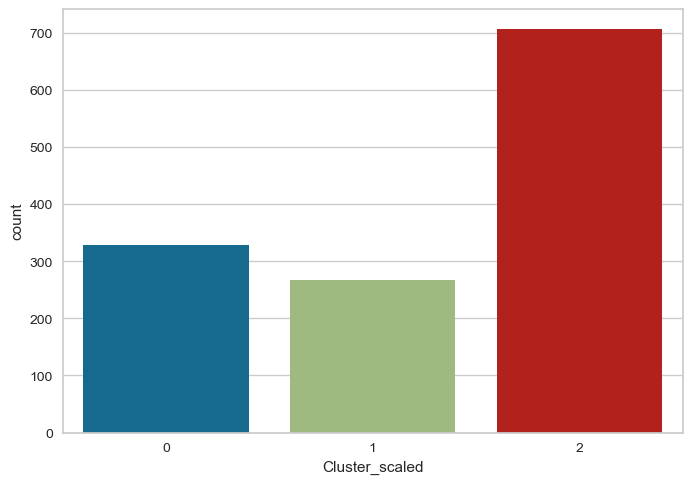

In [184]:
sns.countplot( x=df_x_outlier['Cluster_scaled'])

<AxesSubplot:xlabel='Cluster_scaled', ylabel='count'>

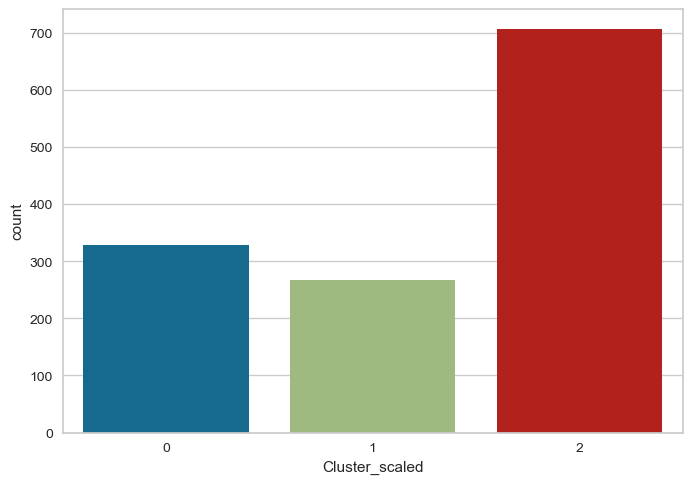

In [186]:
sns.countplot( x=df_x_outlier['Cluster_scaled'])

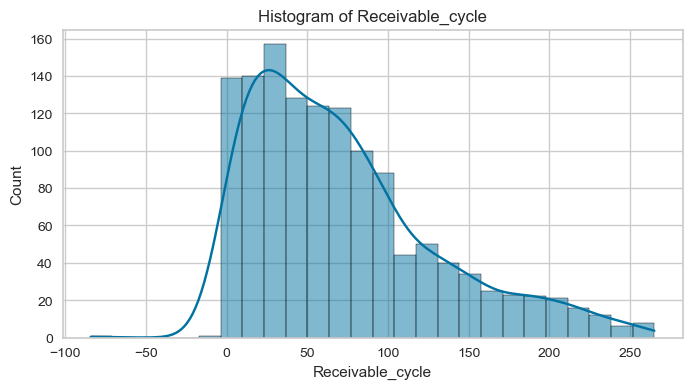

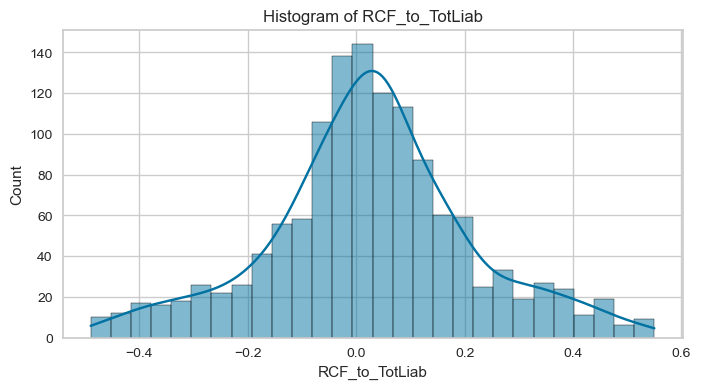

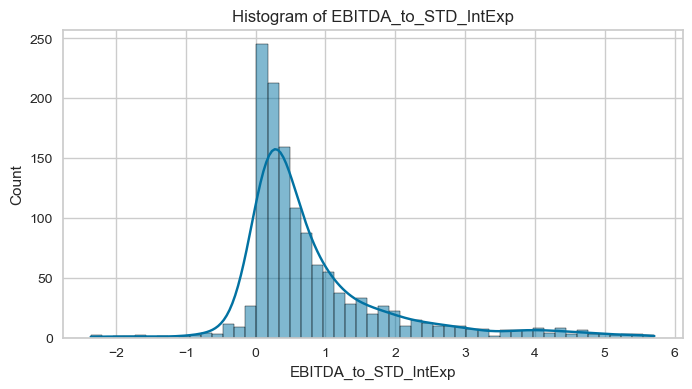

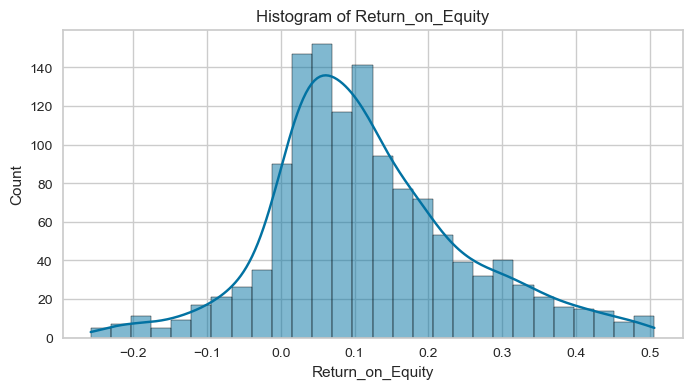

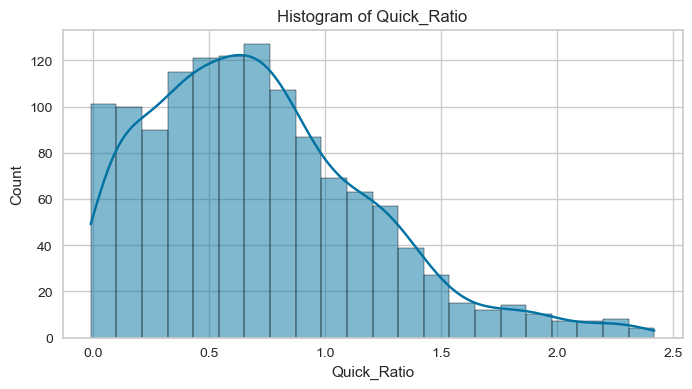

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your_data is a DataFrame with multiple columns
for column in X_data_outlier.columns:
    plt.figure(figsize=(8, 4))
    
    # Plot a histogram for each column
    sns.histplot( X_data_outlier[column], kde=True)
    plt.title(f"Histogram of {column}")
    
    # You can also add Q-Q plots for each column
    plt.show()

In [188]:
# Shapiro-Wilk test or D'Agostino and Pearson's test


from scipy.stats import shapiro, normaltest

# Assuming your_data is a DataFrame with multiple columns
for column in X_data_outlier.columns:
    stat_sw, p_sw = shapiro(X_data_outlier[column])
    stat_dap, p_dap = normaltest(X_data_outlier[column])
    
    print(f"Column: {column}")
    print(f"Shapiro-Wilk Statistic: {stat_sw:.4f}, p-value: {p_sw:.4f}")
    print(f"D'Agostino and Pearson Statistic: {stat_dap:.4f}, p-value: {p_dap:.4f}")
    
    if p_sw > 0.05 and p_dap > 0.05:
        print(f"{column} appears to be normally distributed")
    else:
        print(f"{column} does not appear to be normally distributed")
    print("\n")


Column: Receivable_cycle
Shapiro-Wilk Statistic: 0.9122, p-value: 0.0000
D'Agostino and Pearson Statistic: 175.1620, p-value: 0.0000
Receivable_cycle does not appear to be normally distributed


Column: RCF_to_TotLiab
Shapiro-Wilk Statistic: 0.9852, p-value: 0.0000
D'Agostino and Pearson Statistic: 7.5868, p-value: 0.0225
RCF_to_TotLiab does not appear to be normally distributed


Column: EBITDA_to_STD_IntExp
Shapiro-Wilk Statistic: 0.7775, p-value: 0.0000
D'Agostino and Pearson Statistic: 502.9322, p-value: 0.0000
EBITDA_to_STD_IntExp does not appear to be normally distributed


Column: Return_on_Equity
Shapiro-Wilk Statistic: 0.9729, p-value: 0.0000
D'Agostino and Pearson Statistic: 51.1687, p-value: 0.0000
Return_on_Equity does not appear to be normally distributed


Column: Quick_Ratio
Shapiro-Wilk Statistic: 0.9513, p-value: 0.0000
D'Agostino and Pearson Statistic: 129.2754, p-value: 0.0000
Quick_Ratio does not appear to be normally distributed




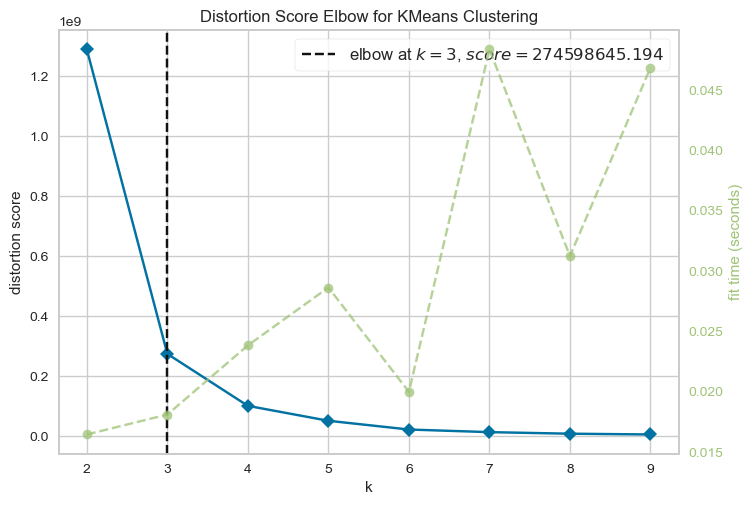

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [195]:
from sklearn.preprocessing import RobustScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 

scaler = RobustScaler()

# fit_transform
X_data_scaled = scaler.fit_transform(X_data)

model = KMeans(random_state=1)
elb_visualizer = KElbowVisualizer(model, k=(2,10))

elb_visualizer.fit(X_data_scaled)
elb_visualizer.show()

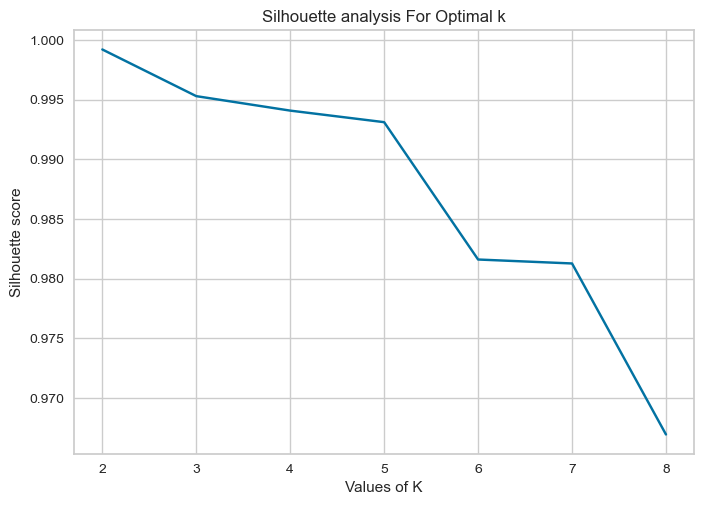

In [196]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_data_scaled)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(X_data_scaled, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [197]:
km_robust = KMeans(n_clusters=3)
km_robust.fit(X_data)
print(km_robust.cluster_centers_)
print(km_robust.labels_)

[[ 1.78358268e+02  5.14466174e-02  1.06040924e+02  4.84511436e-02
   1.10138152e+00]
 [ 4.39100000e+01  3.80000000e-01  7.11076000e+05  2.98500000e-01
   2.03000000e+00]
 [ 6.72188060e+05  3.91500000e+01 -1.12000000e+00 -4.07000000e-02
   7.26200000e+01]]
[0 0 0 ... 0 0 0]


In [37]:
X_data['cluster_robust'] = km_robust.labels_
grouped_robust = X_data.groupby(['cluster_robust']).count()
grouped_robust

C:\Users\459354\AppData\Local\Temp\ipykernel_17080\950837014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data['cluster_robust'] = km_robust.labels_


,Receivable_cycle,RCF_to_TotLiab,EBITDA_to_STD_IntExp,Return_on_Equity,Quick_Ratio
cluster_robust,,,,,
0,2186,2186,2186,2186,2186
1,1,1,1,1,1
2,1,1,1,1,1


## Principal Component Analysis

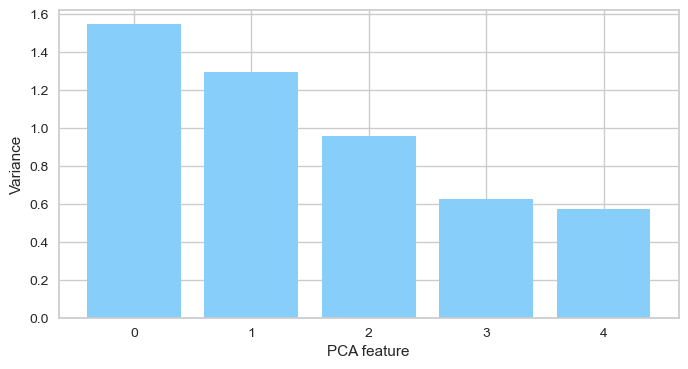

In [198]:
from sklearn.decomposition import PCA
#check for optimal number of features

pca = PCA(random_state=42)
pca.fit(X_data_outlier_scaled)

features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

## Try with 2 PCA Components

In [199]:
pca2 = PCA(n_components=2)
pca2.fit(X_data_outlier_scaled)
x_pca2 = pca2.transform(X_data_outlier_scaled)

In [200]:
pca2.components_

array([[-0.2303931 ,  0.36012421,  0.64792981,  0.55381016,  0.3011824 ],
       [ 0.70498744, -0.06832729,  0.11028648, -0.16034259,  0.67856557]])

In [201]:
X_data_outlier_scaled.shape

(1302, 5)

In [202]:
x_pca2.shape

(1302, 2)

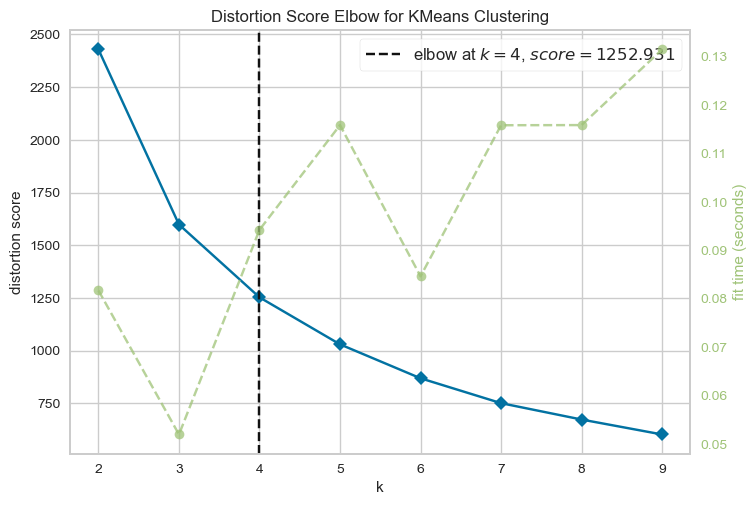

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [203]:

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 


model = KMeans(random_state=1)
elb_visualizer = KElbowVisualizer(model, k=(2,10))

elb_visualizer.fit(x_pca2)
elb_visualizer.show()

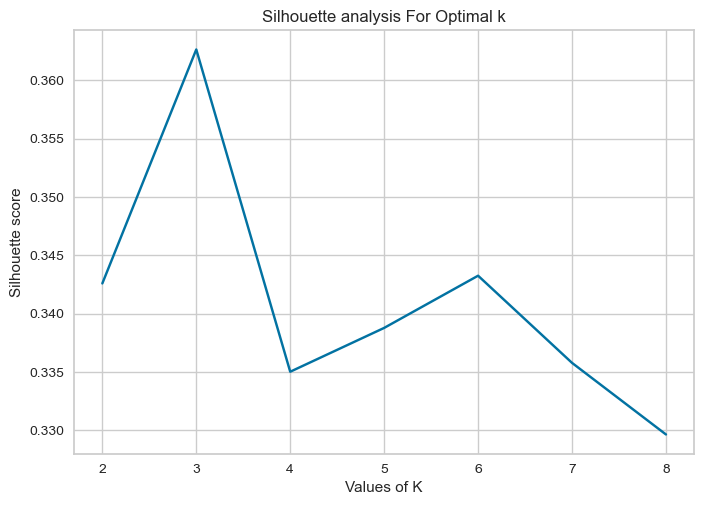

In [204]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(x_pca2)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(x_pca2, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [205]:
km_pca2 = KMeans(n_clusters=3, random_state=42)
km_pca2.fit(x_pca2)
print(km_pca2.cluster_centers_)
print(km_pca2.labels_)

[[-0.64661495  1.23422352]
 [ 1.71067155  0.10281472]
 [-0.45615208 -0.75747937]]
[2 2 0 ... 0 1 2]


In [206]:
column_names = ['First_Principal_Component', 'Second_Principal_Component']

# Create a DataFrame
df_pca2 = pd.DataFrame(x_pca2, columns=column_names)
df_pca2

,First_Principal_Component,Second_Principal_Component
0,-0.26,-0.10
1,-0.82,-1.17
2,0.07,0.66
3,1.42,1.24
4,0.83,2.46
...,...,...
1297,-1.17,0.02
1298,2.40,0.46
1299,-1.11,0.53
1300,1.08,-0.10


In [207]:
df_pca2['Cluster'] = km_pca.labels_
df_pca2

,First_Principal_Component,Second_Principal_Component,Cluster
0,-0.26,-0.10,2
1,-0.82,-1.17,2
2,0.07,0.66,0
3,1.42,1.24,1
4,0.83,2.46,0
...,...,...,...
1297,-1.17,0.02,2
1298,2.40,0.46,1
1299,-1.11,0.53,0
1300,1.08,-0.10,1


<AxesSubplot:xlabel='Cluster', ylabel='count'>

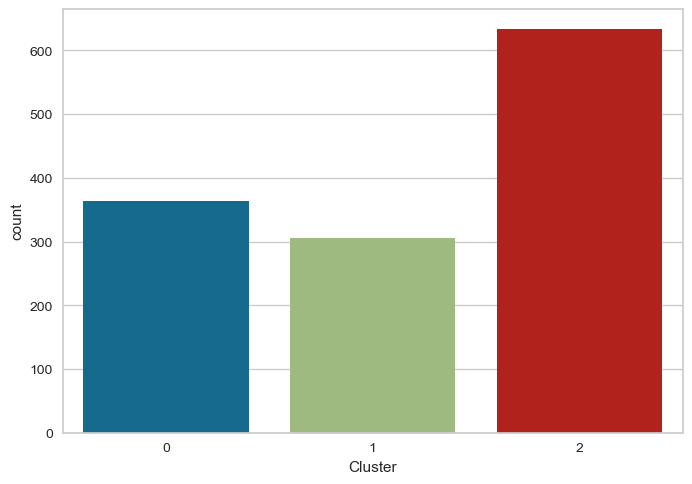

In [208]:
sns.countplot( x=df_pca2['Cluster'])

In [209]:
# X_data = X_data.drop(['cluster_robust'], axis=1)
df_comp = pd.DataFrame(pca2.components_,columns=X_data.columns)

<AxesSubplot:>

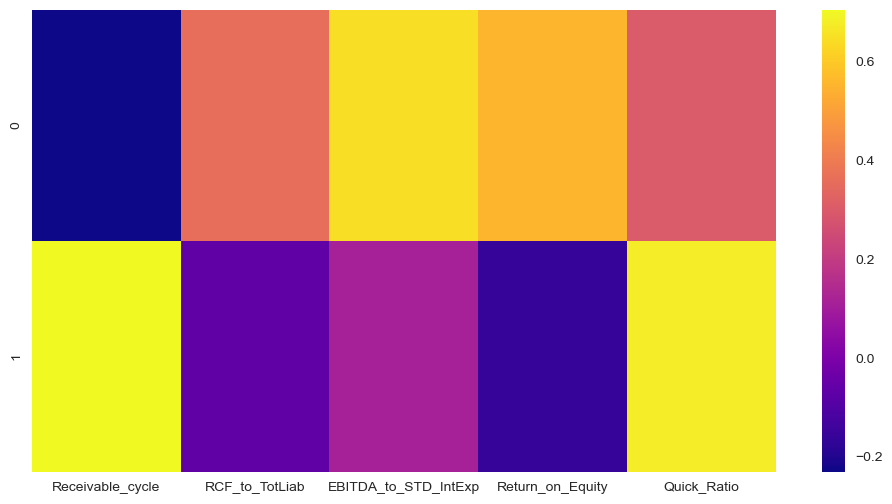

In [210]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

In [211]:
pca1 = PCA(n_components=1)
pca1.fit(X_data_outlier_scaled)
x_pca1 = pca1.transform(X_data_outlier_scaled)

In [212]:
pca1.components_

array([[-0.2303931 ,  0.36012421,  0.64792981,  0.55381016,  0.3011824 ]])

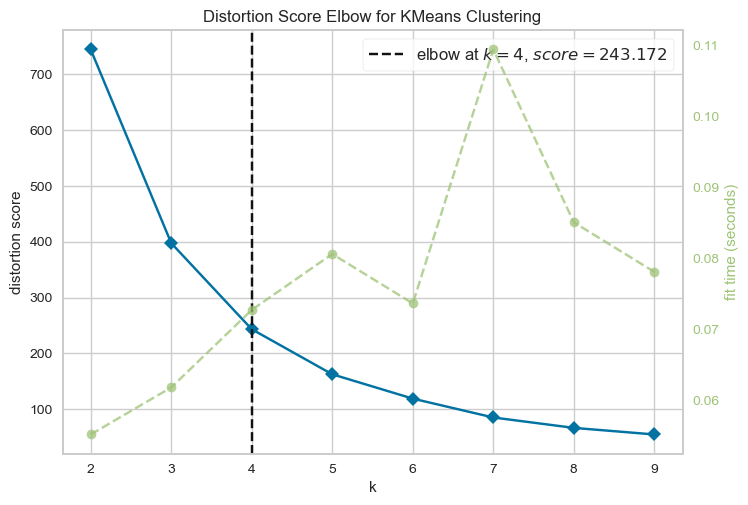

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [213]:

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 


model = KMeans(random_state=1)
elb_visualizer = KElbowVisualizer(model, k=(2,10))

elb_visualizer.fit(x_pca1)
elb_visualizer.show()

In [214]:
df_check = pd.DataFrame(x_pca1)
df_check

,0
0,-0.26
1,-0.82
2,0.07
3,1.42
4,0.83
...,...
1297,-1.17
1298,2.40
1299,-1.11
1300,1.08


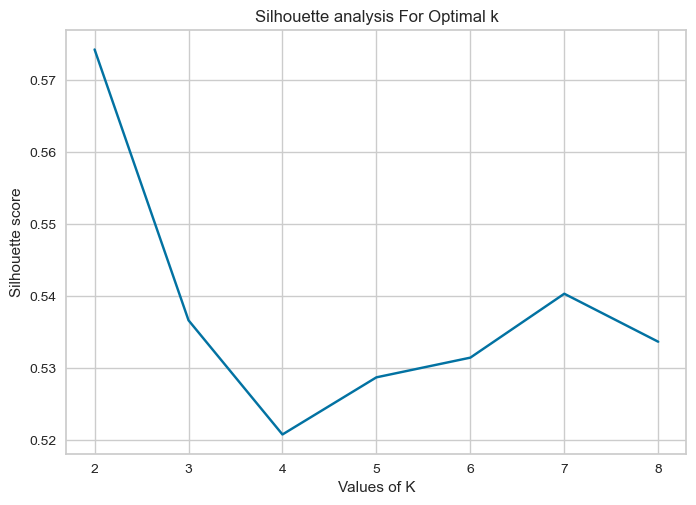

In [215]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(x_pca1)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(x_pca1, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [216]:
km_pca1 = KMeans(n_clusters=3, random_state=42)
km_pca1.fit(x_pca1)
print(km_pca1.cluster_centers_)
print(km_pca1.labels_)

[[-1.00575354]
 [ 2.24991157]
 [ 0.4009178 ]]
[2 0 2 ... 0 2 2]


In [217]:
df_pca1 = pd.DataFrame(x_pca1, columns=['First_Principal_Component'])
df_pca1['Cluster'] = km_pca1.labels_



Text(0.5, 0, 'First principal component')

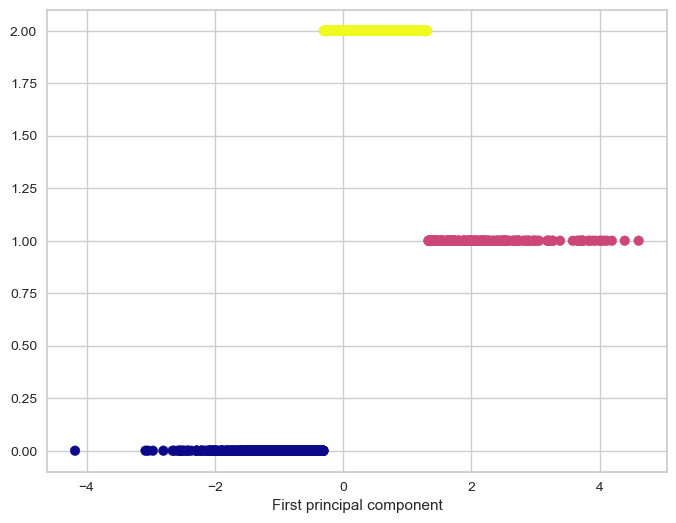

In [218]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca1['First_Principal_Component'],df_pca1['Cluster'],c=df_pca1['Cluster'] , cmap='plasma')
plt.xlabel('First principal component')


In [219]:
print(km_pca1.cluster_centers_)

[[-1.00575354]
 [ 2.24991157]
 [ 0.4009178 ]]


<AxesSubplot:xlabel='Cluster', ylabel='count'>

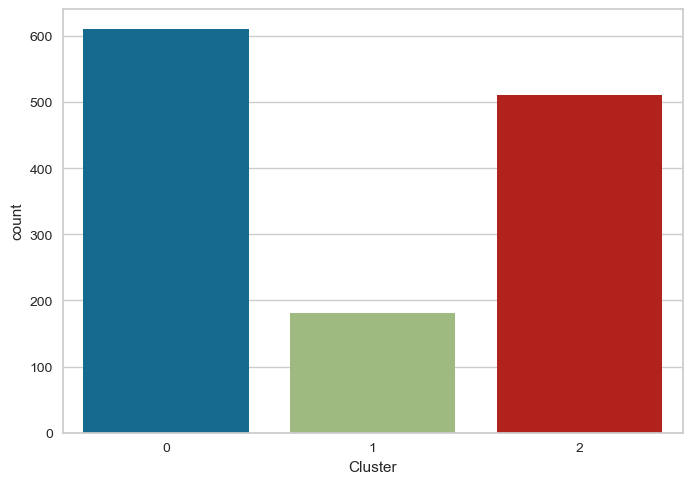

In [220]:
sns.countplot( x=df_pca1['Cluster'])

In [221]:
df_pca1

,First_Principal_Component,Cluster
0,-0.26,2
1,-0.82,0
2,0.07,2
3,1.42,1
4,0.83,2
...,...,...
1297,-1.17,0
1298,2.40,1
1299,-1.11,0
1300,1.08,2


In [230]:
with pd.ExcelWriter(r'C:\Users\459354\Desktop\Python\Clustering\clusters.xlsx', engine='xlsxwriter') as writer:
  
    df_pca1.to_excel(writer, sheet_name='pca1', index=False)
    df_pca2.to_excel(writer, sheet_name='pca2', index=False)
    df_x_outlier.to_excel(writer, sheet_name='k_means', index=False)


Text(0, 0.5, 'Second Principal Component')

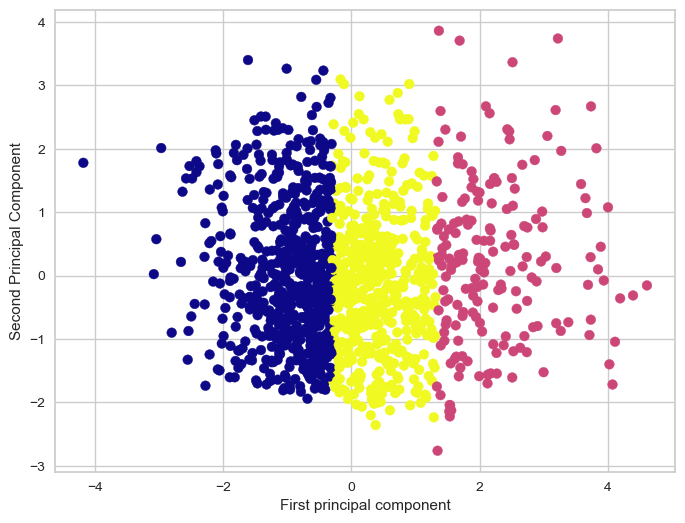

In [224]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_pca1['Cluster'] , cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

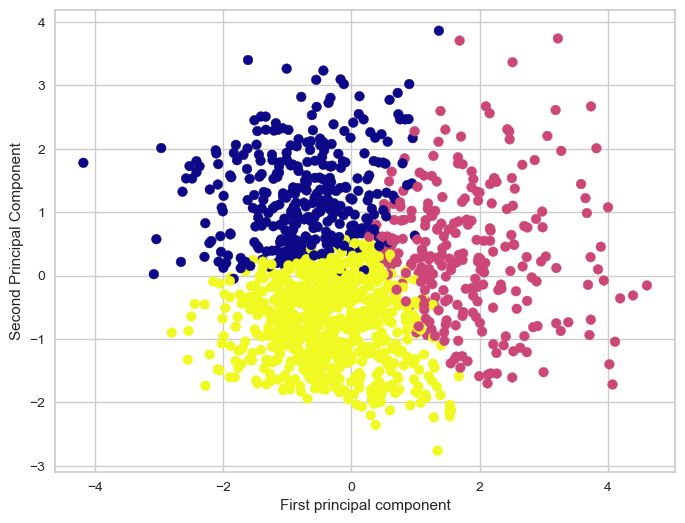

In [225]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_x_outlier['Cluster_scaled'] , cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Hierarchical Clustering

In [227]:
from sklearn.cluster import AgglomerativeClustering
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(X_data_outlier_scaled)
hcluster_label = hcluster.labels_

In [229]:
df_x_outlier['hcluster'] = hcluster_label 
df_x_outlier

C:\Users\459354\AppData\Local\Temp\ipykernel_17080\748245907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_outlier['hcluster'] = hcluster_label


,NAME,ID_NUMBER,Receivable_cycle,RCF_to_TotLiab,EBITDA_to_STD_IntExp,Return_on_Equity,Quick_Ratio,Cluster_scaled,Cluster_x_scaled,hcluster
0,3G AUTO SPARES SDN. BHD.,984820H,83.24,-0.08,0.39,0.19,0.62,2,0,0
3,A-LOOK EYEWEAR SDN. BHD.,591659X,6.32,-0.10,1.61,-0.11,0.17,2,2,1
5,AAY CONSTRUCTION SDN. BHD.,84131T,139.62,0.16,1.10,0.11,0.62,0,1,2
6,AB TECHNOLOGY (M) SDN. BHD.,411227K,82.25,0.33,2.22,0.03,1.41,1,0,0
7,ABEX MEDICAL SYSTEM SDN BHD,074062D,128.18,-0.08,1.54,0.14,1.92,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2179,ZETRO SERVICES SDN. BHD.,236761P,118.05,0.02,0.15,0.04,0.32,2,0,1
2180,ZETWIND ENTERPRISE SDN. BHD.,713419X,80.96,0.25,3.31,0.21,0.93,1,0,0
2181,ZHONG YING CONSTRUCTION SDN. BHD.,274036A,103.26,0.15,0.24,-0.09,0.72,0,0,0
2185,ZUE BAO JEWELLERY SDN. BHD.,615964U,0.27,0.55,0.27,0.05,1.38,1,2,0


In [37]:
robust_scaled_df = pd.DataFrame(data=X_data_scaled, columns=X_data.columns)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit_transform
X_data_scaled_standard = scaler.fit_transform(X_data)

standard_scaled_df = pd.DataFrame(data=X_data_scaled_standard, columns=X_data.columns)


In [39]:
with pd.ExcelWriter(r'C:\Users\459354\Desktop\Python\Clustering\scaled_data.xlsx', engine='xlsxwriter') as writer:
  
    robust_scaled_df.to_excel(writer, sheet_name='robust', index=False)
    standard_scaled_df.to_excel(writer, sheet_name='standard', index=False)
    